In [7]:
import pandas as pd
import numpy as np
from pathlib import Path

In [8]:
folder = Path('/data01/bgutman/parkinson_ebm/results/mc_mc_results')

In [5]:
# folder = Path('/data01/bgutman/MRI_data/PPMI/EBM_data/')
# data = pd.read_csv(folder / 'corrected_ENIGMA-PD_Mixed_Effects_train_test_split.csv', index_col=0)

# old results

In [9]:
# Load results from MCMC run
best_orders = {}
# CORRECTED PARKINSON
# No connectivity prior
all_orders = np.load(folder / 'logs/order_mcmc.npy')
order_map, best_order = get_optimal_order(all_orders)
best_orders['order_mcmc'] = best_order

# With connectivity prior
all_orders_prior = np.load(folder / 'logs/prior_order_mcmc.npy')
order_map_prior, best_order = get_optimal_order(all_orders_prior)
best_orders['prior_order_mcmc'] = best_order

# UNCORRECTED PARKINSON
# No connectivity prior
all_orders = np.load(folder / 'logs/uncorrected_order_mcmc.npy')
order_map, best_order = get_optimal_order(all_orders)
best_orders['uncorrected_order_mcmc'] = best_order

# With connectivity prior
all_orders_prior = np.load(folder / 'logs/prior_uncorrected_order_mcmc.npy')
order_map_prior, best_order = get_optimal_order(all_orders_prior)
best_orders['prior_uncorrected_order_mcmc'] = best_order


# UNCORRECTED ADNI
# No connectivity prior
all_orders = np.load(folder / 'logs/adni_order_mcmc.npy')
order_map, best_order = get_optimal_order(all_orders)
best_orders['adni_order_mcmc'] = best_order

# With connectivity prior
all_orders_prior = np.load(folder / 'logs/adni_prior_order_mcmc.npy')
order_map_prior, best_order = get_optimal_order(all_orders_prior)
best_orders['adni_prior_order_mcmc'] = best_order


# UNCORRECTED ADNI only NC AD
# No connectivity prior
all_orders = np.load(folder / 'logs/trunc_adni_order_mcmc.npy')
order_map, best_order = get_optimal_order(all_orders)
best_orders['adni_trunc_order_mcmc'] = best_order

# With connectivity prior
all_orders_prior = np.load(folder / 'logs/adni_prior_trunc_order_mcmc.npy')
order_map_prior, best_order = get_optimal_order(all_orders_prior)
best_orders['adni_prior_trunc_order_mcmc'] = best_order


In [10]:
# best_orders

In [29]:
# cols= np.array([c for c in data.columns if 'thick' in c])
# cols = np.array(['_'.join(c.split('_')[:-1]) for c in cols])

# very old results

In [34]:
best_order_prior_old = np.array([ 4,  5, 28, 65, 38, 48, 39, 41, 47, 62, 63, 40, 57,  7, 31, 13, 29,
       17, 18, 16,  6, 22, 56, 36, 26,  2, 25, 10, 30, 60, 49, 55, 42, 43,
       61, 54, 50, 52, 59, 51, 44, 67, 66, 34,  8, 23, 27,  9, 11, 14, 19,
        3, 37, 53, 45, 46, 64, 24, 12, 33, 32,  0, 58, 35,  1, 21, 15, 20])


best_order_aver_prior_old = np.array([17, 28, 38, 65, 13,  7,  5,  4, 31, 10, 26, 25,  0, 33, 62, 47, 39,
       48, 41, 40, 36, 16, 18, 29, 27, 42, 53, 59, 30, 12, 46, 67, 66, 57,
       37,  3, 19,  9, 43, 51, 52, 50, 34, 63, 54, 61,  8, 32,  6,  2, 22,
       55, 49, 56, 60, 35, 58, 24, 64, 44, 45, 11, 14, 23, 20, 15, 21,  1])

best_order_plain_old = np.array([17,  5, 28, 39, 47, 38, 65, 62,  7, 40, 13, 26, 10,  0,  4, 31, 48,
       67, 33, 41, 60, 25, 63, 57, 50, 44,  2, 16, 36, 29, 23,  6,  9, 18,
       27, 22, 56, 14,  8, 53, 42, 59, 46, 43, 54, 61, 20, 45, 49,  3, 19,
       37, 55, 52, 30, 24, 21, 34, 58, 66, 51, 12, 32, 35, 11, 64, 15,  1])



In [57]:
orders = pd.DataFrame()
orders['adni_order_mcmc'] = cols[best_orders['adni_order_mcmc']]
orders['adni_prior_order_mcmc'] = cols[best_orders['adni_prior_order_mcmc']]
orders['adni_best_order_plain_old'] = cols[best_order_plain_old]
orders['adni_best_order_prior_old'] = cols[best_order_prior_old]
orders['adni_best_order_aver_prior_old'] = cols[best_order_aver_prior_old]
orders['adni_trunc_order_mcmc'] = cols[best_orders['adni_trunc_order_mcmc']]
orders['adni_prior_trunc_order_mcmc'] = cols[best_orders['adni_prior_trunc_order_mcmc']]
orders['order_mcmc'] = cols[best_orders['order_mcmc']]
orders['prior_order_mcmc'] = cols[best_orders['prior_order_mcmc']]
orders['uncorrected_order_mcmc'] = cols[best_orders['uncorrected_order_mcmc']]
orders['prior_uncorrected_order_mcmc'] = cols[best_orders['prior_uncorrected_order_mcmc']]

orders['adni_trunc_order_mcmc'] = cols[best_orders['adni_trunc_order_mcmc']]
orders['adni_prior_trunc_order_mcmc'] = cols[best_orders['adni_prior_trunc_order_mcmc']]

In [58]:
orders.to_csv('/data01/bgutman/MRI_data/PPMI/EBM_data/orders_all_experiments.csv')

In [59]:
orders.head(10)

,adni_order_mcmc,adni_prior_order_mcmc,adni_best_order_plain_old,adni_best_order_prior_old,adni_best_order_aver_prior_old,adni_trunc_order_mcmc,adni_prior_trunc_order_mcmc,order_mcmc,prior_order_mcmc,uncorrected_order_mcmc,prior_uncorrected_order_mcmc
0,R_entorhinal,R_entorhinal,L_parsorbitalis,L_entorhinal,L_parsorbitalis,R_entorhinal,R_entorhinal,R_lateraloccipital,R_lateraloccipital,R_lateralorbitofrontal,R_lateralorbitofrontal
1,L_entorhinal,L_entorhinal,L_fusiform,L_fusiform,L_superiortemporal,L_entorhinal,L_entorhinal,L_lateraloccipital,R_inferiorparietal,R_inferiortemporal,R_inferiortemporal
2,L_inferiortemporal,L_inferiortemporal,L_superiortemporal,L_superiortemporal,R_entorhinal,L_inferiortemporal,L_inferiortemporal,L_inferiorparietal,L_inferiorparietal,R_superiorfrontal,R_superiorfrontal
3,R_inferiortemporal,R_inferiortemporal,R_fusiform,R_temporalpole,R_temporalpole,R_inferiortemporal,R_inferiortemporal,R_inferiorparietal,R_superiorparietal,R_superiortemporal,R_superiortemporal
4,L_rostralanteriorcingulate,L_rostralanteriorcingulate,R_middletemporal,R_entorhinal,L_middletemporal,L_rostralanteriorcingulate,L_rostralanteriorcingulate,R_superiorparietal,L_superiorparietal,R_postcentral,R_postcentral
5,L_middletemporal,L_middletemporal,R_entorhinal,R_parahippocampal,L_inferiortemporal,R_fusiform,R_fusiform,L_superiorparietal,L_precuneus,R_middletemporal,R_middletemporal
6,R_fusiform,R_fusiform,R_temporalpole,R_fusiform,L_fusiform,R_middletemporal,R_middletemporal,L_precuneus,R_precuneus,L_lateraloccipital,L_lateraloccipital
7,R_bankssts,R_bankssts,R_superiortemporal,R_inferiortemporal,L_entorhinal,L_precuneus,L_precuneus,R_precuneus,L_supramarginal,L_postcentral,L_postcentral
8,L_inferiorparietal,R_middletemporal,L_inferiortemporal,R_middletemporal,L_temporalpole,R_medialorbitofrontal,L_medialorbitofrontal,L_supramarginal,L_paracentral,L_superiorparietal,L_superiorparietal
9,L_bankssts,L_inferiorparietal,R_inferiorparietal,R_superiortemporal,L_lateralorbitofrontal,L_medialorbitofrontal,R_medialorbitofrontal,L_paracentral,L_precentral,L_inferiorparietal,L_inferiorparietal


In [64]:
orders = pd.DataFrame()
orders['adni_order_mcmc'] = np.argsort(best_orders['adni_order_mcmc'])
orders['adni_prior_order_mcmc'] = np.argsort(best_orders['adni_prior_order_mcmc'])
orders['adni_best_order_plain_old'] = np.argsort(best_order_plain_old)
orders['adni_best_order_prior_old'] = np.argsort(best_order_prior_old)
orders['adni_best_order_aver_prior_old'] = np.argsort(best_order_aver_prior_old)
orders['adni_trunc_order_mcmc'] = np.argsort(best_orders['adni_trunc_order_mcmc'])
orders['adni_prior_trunc_order_mcmc'] = np.argsort(best_orders['adni_prior_trunc_order_mcmc'])
orders['order_mcmc'] = np.argsort(best_orders['order_mcmc'])
orders['prior_order_mcmc'] = np.argsort(best_orders['prior_order_mcmc'])
orders['uncorrected_order_mcmc'] = np.argsort(best_orders['uncorrected_order_mcmc'])
orders['prior_uncorrected_order_mcmc'] = np.argsort(best_orders['prior_uncorrected_order_mcmc'])

In [27]:
from scipy.stats import spearmanr

In [69]:
for c1 in orders[['adni_best_order_aver_prior_old', 'adni_prior_trunc_order_mcmc']].columns:
    for c2 in orders[['adni_best_order_aver_prior_old', 'adni_prior_trunc_order_mcmc']].columns:
        if c1 != c2:
            print(c1, c2)
            print(spearmanr(orders[c1][:10], orders[c2][:10]))
            print('========')
            print('')

adni_best_order_aver_prior_old adni_prior_trunc_order_mcmc
SpearmanrResult(correlation=0.1515151515151515, pvalue=0.6760651759978538)

adni_prior_trunc_order_mcmc adni_best_order_aver_prior_old
SpearmanrResult(correlation=0.1515151515151515, pvalue=0.6760651759978538)



# newer results

In [15]:
list((folder / 'adni' / 'point_proba' / 'aver_prior').glob('*.npy'))

[PosixPath('/data01/bgutman/parkinson_ebm/results/mc_mc_results/adni/point_proba/aver_prior/order_greedy_ascent.npy'),
 PosixPath('/data01/bgutman/parkinson_ebm/results/mc_mc_results/adni/point_proba/aver_prior/loglike_greedy_ascent.npy'),
 PosixPath('/data01/bgutman/parkinson_ebm/results/mc_mc_results/adni/point_proba/aver_prior/update_iters_greedy_ascent.npy'),
 PosixPath('/data01/bgutman/parkinson_ebm/results/mc_mc_results/adni/point_proba/aver_prior/order_mcmc.npy'),
 PosixPath('/data01/bgutman/parkinson_ebm/results/mc_mc_results/adni/point_proba/aver_prior/loglike_mcmc.npy'),
 PosixPath('/data01/bgutman/parkinson_ebm/results/mc_mc_results/adni/point_proba/aver_prior/update_iters_mcmc.npy'),
 PosixPath('/data01/bgutman/parkinson_ebm/results/mc_mc_results/adni/point_proba/aver_prior/probas_mcmc.npy')]

In [53]:
new_adni = np.load(folder / 'adni' / 'point_proba' / 'aver_prior' / 'order_mcmc.npy')
new_adni_cdf = np.load(folder / 'adni' / 'cdf_proba' / 'no_prior' / 'order_mcmc.npy')


(350002, 68)

In [22]:
new_adni.shape

(336933, 68)

In [20]:
order_map, best_order = get_optimal_order(new_adni)

In [46]:
like = np.load('/data01/bgutman/parkinson_ebm/results/mc_mc_results/adni/point_proba/aver_prior/loglike_mcmc.npy')
like_cdf = np.load('/data01/bgutman/parkinson_ebm/results/mc_mc_results/adni/cdf_proba/aver_prior/loglike_mcmc.npy')

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

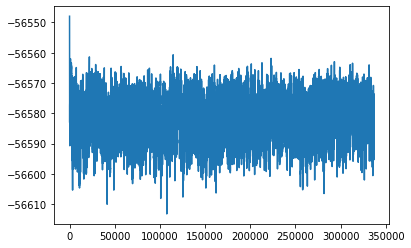

In [26]:
plt.plot(like);

In [30]:
like[0]

-56547.96389301381

In [47]:
np.argmax(like_cdf)

0

In [38]:
spearmanr(np.argsort(new_adni[0]), np.argsort(best_order))

SpearmanrResult(correlation=0.7366492346451884, pvalue=8.056994429335501e-13)

In [39]:
spearmanr(np.argsort(new_adni[0]), np.argsort(new_adni[-1]))

SpearmanrResult(correlation=0.793335114707791, pvalue=7.277964326626279e-16)

In [21]:
best_order

array([14,  4, 38, 48, 65, 31, 13, 47, 41, 39,  7, 34, 67, 46, 32, 63, 40,
       36,  2,  6, 25, 29, 26, 30,  0, 66, 23, 60, 22, 59, 18, 20,  8, 33,
       28, 54, 42, 56, 12, 49, 16, 58, 57, 52, 43, 35, 15, 44, 55, 37, 51,
       64, 11, 45, 53, 19, 10,  9, 24, 21,  3,  1, 50, 61, 17, 27,  5, 62])

In [40]:
best_order_aver_prior_old = np.array([17, 28, 38, 65, 13,  7,  5,  4, 31, 10, 26, 25,  0, 33, 62, 47, 39,
       48, 41, 40, 36, 16, 18, 29, 27, 42, 53, 59, 30, 12, 46, 67, 66, 57,
       37,  3, 19,  9, 43, 51, 52, 50, 34, 63, 54, 61,  8, 32,  6,  2, 22,
       55, 49, 56, 60, 35, 58, 24, 64, 44, 45, 11, 14, 23, 20, 15, 21,  1])

In [37]:
new_adni[0]

array([14,  4, 38, 48, 65, 31, 13, 47, 41, 39,  7,  5, 34, 40, 32,  0,  6,
       27, 23, 29, 17, 25, 30, 64, 60, 26, 18,  2, 36, 59,  8, 22, 20, 66,
       62, 63, 54, 67, 46, 12, 33, 28, 61, 42, 11, 10, 16, 37, 49, 57, 43,
       44, 52, 50, 56, 55, 35, 58, 51, 45, 53, 15, 24,  1, 21,  3, 19,  9])

In [41]:
spearmanr(np.argsort(new_adni[0]), np.argsort(best_order_aver_prior_old))

SpearmanrResult(correlation=0.5146009085009734, pvalue=7.143521746608697e-06)

In [42]:
spearmanr(np.argsort(best_order), np.argsort(best_order_aver_prior_old))

SpearmanrResult(correlation=0.3228613963430927, pvalue=0.007245417216825878)

In [45]:
new_adni_cdf

array([[14,  4, 38, ...,  3, 19,  9],
       [14,  4, 38, ...,  3, 19,  9],
       [14,  4, 38, ...,  3, 19,  9],
       ...,
       [14,  4, 38, ..., 51,  9,  3],
       [14,  4, 38, ..., 51,  9,  3],
       [14,  4, 38, ..., 51,  9,  3]])

In [48]:
spearmanr(np.argsort(new_adni_cdf[0]), np.argsort(best_order_aver_prior_old))

SpearmanrResult(correlation=0.5146009085009734, pvalue=7.143521746608697e-06)

In [50]:
np.allclose(new_adni, new_adni_cdf)

True

In [51]:
bool(0)

False

In [52]:
bool(1)

True

In [68]:
df = pd.read_csv('/data01/bgutman/parkinson_ebm/data/ENIGMA-PD-regional.csv', index_col=0)
df = pd.read_csv('/data01/bgutman/parkinson_ebm/data/ENIGMA-PD-regional_corrected_mixed_effects.csv', index_col=0)

In [76]:
like = np.load('/data01/bgutman/parkinson_ebm/results/mc_mc_results/parkinson/point_proba/aver_prior/loglike_mcmc.npy')
order = np.load('/data01/bgutman/parkinson_ebm/results/mc_mc_results/parkinson/point_proba/aver_prior/order_mcmc.npy')

In [85]:
np.argmax(like)

20058

In [86]:
best_order = order[20058]

In [83]:
from pathlib import Path
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

from ebm.probability import log_distributions, fit_distributions, predict_stage
from ebm.mcmc import greedy_ascent, mcmc, get_optimal_order

import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
folder = Path('/data01/bgutman/MRI_data/PPMI/EBM_data/')
data = pd.read_csv(folder / 'corrected_ENIGMA-PD_Mixed_Effects_train_test_split.csv', index_col=0)
df = pd.read_csv(folder / 'ENIGMA-PD-regional.csv') # to merge with data, to obtain patients' metadata

train, test = train_test_split(data, stratify=data['cohort'], test_size=0.1, random_state=777)
X_train = train.drop(['SubjID', 'Dx', 'Sex', 'Age', 'cohort'], axis=1).values
y_train = train['Dx'].values
X_test = test.drop(['SubjID', 'Dx', 'Sex', 'Age', 'cohort'], axis=1).values
y_test = test['Dx'].values

# Precompute train, test probability distributions P(x| E), P(x| not E)

train_log_p_e, train_log_p_not_e = log_distributions(X_train, y_train)
test_log_p_e, test_log_p_not_e = log_distributions(X_train, y_train, X_test=X_test, y_test=y_test)

In [88]:
stages = predict_stage(best_order, train_log_p_e, train_log_p_not_e)

In [89]:
folder = Path('/data01/bgutman/MRI_data/PPMI/EBM_data/')
data = pd.read_csv(folder / 'corrected_ENIGMA-PD_Mixed_Effects_train_test_split.csv', index_col=0)
df = pd.read_csv(folder / 'ENIGMA-PD-regional.csv') # to merge with data, to obtain patients' metadata

In [90]:
probas = predict_stage(best_order, train_log_p_e, train_log_p_not_e).T
stage = np.argmax(probas, axis=1)
train['pred_stage'] = stage

In [91]:
train_stages = pd.merge(left=df[['SubjID', 'site', 'cohort', 'HY1234']], right=train, on='SubjID', how='right')

In [93]:
train_stages[['HY1234', 'Dx', 'pred_stage']].groupby('HY1234')['pred_stage'].agg(['median','mean', 'std', 'count'])

,median,mean,std,count
HY1234,,,,
0.0,29.0,31.287856,21.440004,667
1.0,29.0,31.660287,21.426404,209
2.0,28.0,31.625490,21.588920,510
3.0,26.5,31.783333,21.678004,120
4.0,41.5,36.968750,19.973344,32


In [94]:
train_stages[['site','HY1234', 'Dx', 'pred_stage']].groupby(['site','HY1234'])['pred_stage'].agg(['median','mean', 'std', 'count'])

median       mean        std  count
site     HY1234                                     
Bern     0.0       29.5  31.857143  22.127757     42
         1.0        3.0   3.000000        NaN      1
         2.0       28.5  31.714286  21.495719     14
         3.0       56.0  46.100000  19.139546     10
         4.0       55.0  48.500000  16.683325      4
CGU      0.0       21.0  27.991597  21.411424    119
         1.0       32.0  32.450000  22.608088     40
         2.0       29.0  29.145833  18.731007     48
         3.0       27.0  33.222222  21.455380     27
         4.0       38.0  32.071429  18.804518     14
FSL      0.0       27.0  31.914286  21.367060     35
         1.0       15.5  21.000000  24.915858      6
         2.0       27.0  33.136364  24.227681     22
         3.0       19.5  19.500000   4.949747      2
GRAZ     0.0       35.0  33.480519  21.214823     77
         1.0       27.5  30.000000  22.504321     10
         2.0       34.0  34.508772  21.172862     57
         3.0       19.0  22.400000  16.562005      5
Liege1   0.0       36.0  33.058824  20.302311     17
         1.0       14.0  14.000000   7.071068      2
         2.0       47.5  40.500000  20.315566     10
         3.0       60.0  60.000000   1.414214      2
Liege2   0.0       40.0  36.833333  15.882843     18
         1.0       39.5  36.500000  17.121415      8
         2.0       38.5  36.375000  19.212626      8
         3.0       24.0  24.000000        NaN      1
Milan    0.0       22.0  22.100000  20.223474     10
         2.0       19.0  30.842105  23.641449     19
         3.0       61.0  54.000000  14.674240      4
Neurocon 0.0       43.0  41.500000  20.431069      8
...                 ...        ...        ...    ...
PPMI     2.0       24.0  31.491228  22.287044    114
         3.0       16.5  16.500000  16.263456      2
Penn     0.0       14.0  21.777778  18.806766      9
         1.0       36.5  36.500000  23.334524      2
         2.0       31.0  33.214286  21.874392     14
         3.0       28.5  30.833333  22.205888     24
Stanford 0.0       25.0  31.000000  22.129489      8
         2.0       23.0  30.363636  19.314620     11
         3.0       59.5  55.750000  13.047988      4
         4.0       23.0  23.000000        NaN      1
TaoWu    0.0       48.5  42.375000  19.419706      8
         1.0       41.0  41.000000   9.899495      2
         2.0       18.0  29.125000  26.674962      8
         3.0       12.0  12.000000        NaN      1
UNICAMP  0.0       19.0  26.000000  20.088042    103
         1.0       34.0  31.166667  20.120958     18
         2.0       14.0  20.681818  17.669954     22
         3.0       13.0  21.937500  18.880215     16
         4.0       17.0  25.800000  22.709029      5
UOMmain  0.0       37.0  38.866667  20.594266     15
         2.0       43.0  40.000000  20.704267      4
         3.0       20.0  29.000000  33.421550      3
         4.0       65.0  57.333333  13.279056      3
UOMpilot 0.0       23.0  28.000000  19.646883      4
         2.0       56.0  58.666667   6.429101      3
Udal     1.0       66.0  66.000000        NaN      1
         2.0       19.0  20.333333  16.365614     21
VUMC1    0.0       23.5  30.076923  24.825669     26
VUMC2    2.0       18.0  27.647059  24.072654     17
         3.0       32.0  32.000000  39.597980      2

[74 rows x 4 columns]